In [1]:
import pandas as pd
import numpy as np
from utils.connectome import Connectome
import utils.helpers as helpers
import os

In [2]:
current_path = os.getcwd()

datafolder_path = os.path.join(current_path, 'PNC')

fmri_timeseries_directory = os.path.join(os.path.join(datafolder_path, 'fmri_timeseries'), "Schaefer218")
dmri_connectome_directory = os.path.join(os.path.join(datafolder_path, 'dmri_connectomes'), "Schaefer218_sift2")
fmri_connectome_directory = os.path.join(os.path.join(datafolder_path, 'fmri_connectomes'), "Schaefer218")

In [3]:
import os

fmri_timeseries_names = [name for name in os.listdir(fmri_timeseries_directory)]
dmri_connectome_names = [name for name in os.listdir(dmri_connectome_directory)]
fmri_connectome_names = [name for name in os.listdir(fmri_connectome_directory)]

metadata_path = os.path.join(datafolder_path, 'GO1_MasterSheet_20190408.xlsx')

In [4]:
metadata = pd.read_excel(metadata_path)

metadata

,Subject,bblid,scanid,ScanAgeYears,Sex,RaceDetailed,RaceCollapsed,Ethnicity,ageAtClinicalAssess1,ageAtCnb1,...,dtiQA Exclude,dtiQA Pass,dtiSCNetworkLausanneExists,dtiSCNetworkSchaeferExists,restVoxelwiseCoverageExclude,restExclude,restExcludeVoxelwise,restQA Pass,restNetworkLausanneExists,restNetworkSchaeferExists
0,080961_002632,80961,2632,21.583,M,1,1,2,259,259,...,0,1,0,0,0,1,1,0,1,1
1,080199_002637,80199,2637,20.333,M,5,3,1,243,244,...,0,1,0,0,0,0,0,1,1,1
2,080179_002643,80179,2643,21.167,F,1,1,2,254,254,...,0,1,0,0,0,0,0,1,1,1
3,081005_002644,81005,2644,20.083,M,1,1,2,241,241,...,0,1,0,0,0,0,0,1,1,1
4,080812_002646,80812,2646,20.583,F,2,2,2,246,246,...,0,1,0,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,139490_008461,139490,8461,8.750,M,2,2,2,104,104,...,1,0,0,0,1,1,1,0,0,0
1597,114672_008464,114672,8464,11.583,M,2,2,1,122,122,...,0,1,1,1,0,1,1,0,1,1
1598,139100_008465,139100,8465,9.833,M,1,1,2,112,112,...,1,0,0,0,1,1,1,0,0,0
1599,129191_008469,129191,8469,10.583,M,1,1,2,112,112,...,1,0,0,0,0,0,0,1,1,1


In [5]:
gender_column = metadata['Sex']

gender_column

0       M
1       M
2       F
3       M
4       F
       ..
1596    M
1597    M
1598    M
1599    M
1600    F
Name: Sex, Length: 1601, dtype: object

In [6]:
get_id = lambda x : x[-4:]
valid_ids = []
valid_subjects = []
valid_meta = pd.DataFrame([])


for subject in metadata['Subject']:
    id = get_id(subject)
    fn = f'{id}.txt'

    if fn in fmri_connectome_names and fn in fmri_timeseries_names and fn in dmri_connectome_names:
        valid_ids.append(id)
        valid_subjects.append(subject)
        valid_meta = pd.concat([valid_meta,metadata[metadata['Subject'] == subject]])
print(len(valid_ids))


819


In [7]:
# calculate the number of "M" and "F" in the metadata

num_m = len(valid_meta[valid_meta['Sex'].str.contains('M')])
num_f = len(valid_meta[valid_meta['Sex'].str.contains('F')])

print(num_m, num_f,num_f+num_m, num_f/(num_f+num_m), num_m/(num_f+num_m))

343 476 819 0.5811965811965812 0.4188034188034188


In [8]:
connectomes = {}

for valid_id, valid_subject in zip(valid_ids, valid_subjects):
    connectomes[valid_subject] = Connectome(os.path.join(fmri_connectome_directory, valid_id + '.txt'), 0.3)
    connectomes[valid_subject].read_connectome()

In [9]:
c = connectomes[list(connectomes.keys())[5]]

c.get_binary_connectome(0.5)
c.connectome



,0,1,2,3,4,5,6,7,8,9,...,208,209,210,211,212,213,214,215,216,217
0,0.000000,0.405141,0.615282,-0.007149,0.481814,0.011915,0.265940,0.062454,0.152716,-0.094164,...,-0.059201,0.316340,0.599055,0.593789,0.507191,0.609208,0.030184,0.396959,0.413211,0.196806
1,0.405141,0.000000,0.621788,0.748871,0.050184,0.664870,0.446386,0.701674,0.463425,0.233255,...,0.187422,-0.006347,0.420977,0.107236,0.302588,0.448258,0.417211,0.095136,-0.002405,0.332015
2,0.615282,0.621788,0.000000,0.208156,0.540143,0.202706,0.149582,0.362025,0.197915,0.125174,...,-0.018882,0.180851,0.529247,0.396350,0.618156,0.689783,0.411713,0.267174,-0.077467,0.338328
3,-0.007149,0.748871,0.208156,0.000000,-0.468610,0.917948,0.319598,0.773543,0.683935,0.436270,...,0.266085,-0.127541,0.001686,-0.207162,-0.039545,0.006385,0.398560,0.091936,0.057679,0.477691
4,0.481814,0.050184,0.540143,-0.468610,0.000000,-0.345068,-0.260190,-0.184107,-0.178347,0.116341,...,-0.096375,0.220062,0.248044,0.169010,0.616765,0.460238,-0.199498,0.270241,-0.023704,-0.174621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0.609208,0.448258,0.689783,0.006385,0.460238,-0.161943,0.284748,0.195803,-0.248063,-0.327215,...,-0.272358,-0.027522,0.532365,0.535567,0.248529,0.000000,0.666445,0.046165,-0.023115,0.087480
214,0.030184,0.417211,0.411713,0.398560,-0.199498,0.148567,0.347544,0.403909,-0.120327,-0.279476,...,-0.127911,-0.337183,0.204585,0.209158,-0.172478,0.666445,0.000000,-0.162689,-0.297307,0.269173
215,0.396959,0.095136,0.267174,0.091936,0.270241,0.149785,0.063115,-0.076914,0.611646,0.352698,...,-0.015686,0.108175,-0.189692,-0.053671,0.327354,0.046165,-0.162689,0.000000,0.339561,0.239409
216,0.413211,-0.002405,-0.077467,0.057679,-0.023704,0.009500,0.177361,0.135665,0.190265,0.145992,...,0.345335,0.691790,0.146166,0.375691,0.201336,-0.023115,-0.297307,0.339561,0.000000,0.082500


          0         1         2         3         4         5         6    \
0    0.000000  0.405141  0.615282 -0.007149  0.481814  0.011915  0.265940   
1    0.405141  0.000000  0.621788  0.748871  0.050184  0.664870  0.446386   
2    0.615282  0.621788  0.000000  0.208156  0.540143  0.202706  0.149582   
3   -0.007149  0.748871  0.208156  0.000000 -0.468610  0.917948  0.319598   
4    0.481814  0.050184  0.540143 -0.468610  0.000000 -0.345068 -0.260190   
..        ...       ...       ...       ...       ...       ...       ...   
213  0.609208  0.448258  0.689783  0.006385  0.460238 -0.161943  0.284748   
214  0.030184  0.417211  0.411713  0.398560 -0.199498  0.148567  0.347544   
215  0.396959  0.095136  0.267174  0.091936  0.270241  0.149785  0.063115   
216  0.413211 -0.002405 -0.077467  0.057679 -0.023704  0.009500  0.177361   
217  0.196806  0.332015  0.338328  0.477691 -0.174621  0.498253  0.335074   

          7         8         9    ...       208       209       210  \
0  

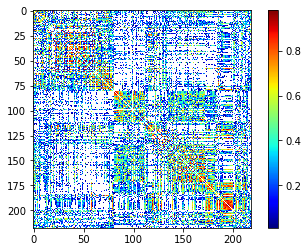

In [19]:
print(c.connectome)

helpers.heatMap(c.connectome, displayPlotFlag=True, backgroundColor='white', threshold=0.01, outputPath='')

In [28]:
m_subjects = valid_meta[valid_meta['Sex']=='M']["Subject"]
f_subjects = valid_meta[valid_meta['Sex']=='F']["Subject"]

In [29]:
connectivity_m = { i : x.get_net_degree_und() for i,x in connectomes.items() if i in list(m_subjects)}

print(connectivity_m)

{'081939_002751': 8257.0, '083372_002796': 2724.0, '081659_002818': 9006.0, '084816_002832': 9313.0, '083322_002854': 7106.0, '084107_002859': 6500.0, '080010_002894': 7768.0, '085394_002909': 8682.0, '084365_002922': 8119.0, '082373_002952': 6383.0, '083999_002954': 6227.0, '082989_002967': 13638.0, '082877_002971': 7802.0, '080498_003013': 8559.0, '080208_003016': 6378.0, '085483_003018': 8183.0, '085165_003034': 8314.0, '082492_003036': 6478.0, '084288_003039': 10979.0, '083972_003081': 8763.0, '083207_003138': 5963.0, '081353_003141': 8328.0, '087947_003210': 7408.0, '089053_003212': 5849.0, '088013_003216': 11335.0, '085173_003226': 7498.0, '088867_003235': 7452.0, '088770_003245': 7201.0, '085960_003323': 8534.0, '085983_003345': 7813.0, '086921_003350': 7521.0, '091422_003372': 6557.0, '087878_003400': 5610.0, '085679_003407': 7430.0, '089653_003428': 5955.0, '086820_003429': 11224.0, '091460_003432': 12220.0, '091310_003435': 17056.0, '080889_003437': 7667.0, '088589_003466': 8

In [30]:
connectivity_f = { i : x.get_net_degree_und() for i,x in connectomes.items() if i in list(f_subjects)}

print(connectivity_m)

{'081939_002751': 8257.0, '083372_002796': 2724.0, '081659_002818': 9006.0, '084816_002832': 9313.0, '083322_002854': 7106.0, '084107_002859': 6500.0, '080010_002894': 7768.0, '085394_002909': 8682.0, '084365_002922': 8119.0, '082373_002952': 6383.0, '083999_002954': 6227.0, '082989_002967': 13638.0, '082877_002971': 7802.0, '080498_003013': 8559.0, '080208_003016': 6378.0, '085483_003018': 8183.0, '085165_003034': 8314.0, '082492_003036': 6478.0, '084288_003039': 10979.0, '083972_003081': 8763.0, '083207_003138': 5963.0, '081353_003141': 8328.0, '087947_003210': 7408.0, '089053_003212': 5849.0, '088013_003216': 11335.0, '085173_003226': 7498.0, '088867_003235': 7452.0, '088770_003245': 7201.0, '085960_003323': 8534.0, '085983_003345': 7813.0, '086921_003350': 7521.0, '091422_003372': 6557.0, '087878_003400': 5610.0, '085679_003407': 7430.0, '089653_003428': 5955.0, '086820_003429': 11224.0, '091460_003432': 12220.0, '091310_003435': 17056.0, '080889_003437': 7667.0, '088589_003466': 8

In [31]:
connectance_m = {i : x.get_connection_density() for i,x in connectomes.items() if i in list(m_subjects)}

connectance_f = {i : x.get_connection_density() for i,x in connectomes.items() if i in list(f_subjects)}


In [32]:
net_str_m = {i : x.get_network_strength() for i,x in connectomes.items() if i in list(m_subjects)}
net_str_f = {i : x.get_network_strength() for i,x in connectomes.items() if i in list(f_subjects)}

net_str_m


{'081939_002751': 8257.0,
 '083372_002796': 2724.0,
 '081659_002818': 9006.0,
 '084816_002832': 9313.0,
 '083322_002854': 7106.0,
 '084107_002859': 6500.0,
 '080010_002894': 7768.0,
 '085394_002909': 8682.0,
 '084365_002922': 8119.0,
 '082373_002952': 6383.0,
 '083999_002954': 6227.0,
 '082989_002967': 13638.0,
 '082877_002971': 7802.0,
 '080498_003013': 8559.0,
 '080208_003016': 6378.0,
 '085483_003018': 8183.0,
 '085165_003034': 8314.0,
 '082492_003036': 6478.0,
 '084288_003039': 10979.0,
 '083972_003081': 8763.0,
 '083207_003138': 5963.0,
 '081353_003141': 8328.0,
 '087947_003210': 7408.0,
 '089053_003212': 5849.0,
 '088013_003216': 11335.0,
 '085173_003226': 7498.0,
 '088867_003235': 7452.0,
 '088770_003245': 7201.0,
 '085960_003323': 8534.0,
 '085983_003345': 7813.0,
 '086921_003350': 7521.0,
 '091422_003372': 6557.0,
 '087878_003400': 5610.0,
 '085679_003407': 7430.0,
 '089653_003428': 5955.0,
 '086820_003429': 11224.0,
 '091460_003432': 12220.0,
 '091310_003435': 17056.0,
 '0808

In [33]:
node_deg_m = {i : x.get_node_degree_und() for i,x in connectomes.items() if i in list(m_subjects)}
node_deg_f = {i : x.get_node_degree_und() for i,x in connectomes.items() if i in list(f_subjects)}

node_deg_m

{'081939_002751': [48,
  89,
  35,
  76,
  46,
  90,
  67,
  58,
  62,
  78,
  76,
  55,
  67,
  61,
  52,
  80,
  73,
  56,
  65,
  35,
  85,
  53,
  98,
  40,
  50,
  74,
  28,
  50,
  61,
  48,
  60,
  88,
  37,
  40,
  78,
  76,
  70,
  94,
  73,
  63,
  88,
  78,
  84,
  52,
  62,
  73,
  66,
  93,
  51,
  98,
  90,
  110,
  61,
  105,
  94,
  72,
  90,
  95,
  59,
  98,
  68,
  110,
  71,
  88,
  74,
  95,
  90,
  101,
  64,
  105,
  85,
  77,
  108,
  79,
  74,
  96,
  84,
  87,
  120,
  95,
  109,
  62,
  92,
  60,
  71,
  90,
  68,
  51,
  73,
  65,
  71,
  89,
  112,
  31,
  67,
  79,
  95,
  94,
  53,
  29,
  34,
  104,
  110,
  38,
  90,
  68,
  102,
  112,
  95,
  92,
  73,
  67,
  45,
  103,
  70,
  89,
  86,
  83,
  77,
  89,
  106,
  103,
  108,
  68,
  69,
  78,
  84,
  100,
  69,
  96,
  102,
  96,
  85,
  57,
  94,
  95,
  106,
  93,
  99,
  101,
  86,
  92,
  104,
  60,
  113,
  112,
  104,
  100,
  92,
  91,
  116,
  88,
  97,
  88,
  89,
  72,
  86,
  102,
  90,
 

In [34]:
# calculate the mean and std of the connectivity

a = [connectivity_m, connectivity_f, connectance_m, connectance_f, net_str_m, net_str_f, node_deg_m, node_deg_f]

b = ["connectivity_m", "connectivity_f", "connectance_m", "connectance_f", "net_str_m", "net_str_f", "node_deg_m", "node_deg_f"]

for m in zip(a,b):
    print(m[1])
    print(np.mean(list(m[0].values())))
    print(np.std(list(m[0].values())))
    print('\n')

connectivity_m
7589.069970845481
1723.3001954439628


connectivity_f
7491.594537815126
1610.4403925229035


connectance_m
7588.747635219808
1723.2270005664805


connectance_f
7491.2763423284705
1610.3719912150323


net_str_m
7589.069970845481
1723.3001954439628


net_str_f
7491.594537815126
1610.4403925229035


node_deg_m
69.62449514537138
29.648426867191397


node_deg_f
68.73022511756996
29.179108941161285


